In [1]:
# Import necessary libraries for data manipulation and analysis
import numpy as np # Numerical operations
import pandas as pd # Data manipulation
from datetime import datetime, timedelta # Date operations

#Import necessary libraries for transformations
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from scipy.stats import skew, kurtosis

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt # Matplotlib for basic plotting
import seaborn as sns # Seaborn for enhanced visualization
import plotly.express as px # Plotly for interactive plots

# Import libraries for time series analysis and modeling
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller Test for stationarity check
from statsmodels.tsa.stattools import kpss # Kwiatkowski-Phillips-Schmidt-Shin Test for stationarity check
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model for time series forecasting
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition for trend, seasonal, and residual components
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima #SARIMAX using pmdarima

# Import necessary libraries for computing acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots
from statsmodels.tsa.stattools import acf, pacf  # For computing autocorrelation and partial autocorrelation

import joblib



SARIMAX for Mindanao
DATA PREPROCESSING

In [18]:
labels_csv = r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Mindanao\train_labels_transformed.csv'
data_csv = r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Mindanao\train_data_transformed.csv'
test_data_csv=r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Mindanao/test_data.csv'
test_labels_csv=r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Mindanao/test_labels.csv'
transformed_data=r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Mindanao/data_transformed.csv'
transformed_test=r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Mindanao/test_data_transformed.csv'
complete_data = r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Mindanao/MIN_Daily_Complete.csv'

transformed_train_data = pd.read_csv(data_csv)
transformed_train_labels = pd.read_csv(labels_csv)
transformed_data = pd.read_csv(transformed_data)
transformed_test_data = pd.read_csv(transformed_test)

test_data = pd.read_csv(test_data_csv)
test_labels = pd.read_csv(test_labels_csv)

complete_data_df = pd.read_csv(complete_data)
gwap = complete_data_df[['GWAP']]
lwap = complete_data_df[['LWAP']]

In [19]:
train_size = int(len(transformed_train_labels))  
test_size = int(len(test_data))

date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
date_df = pd.DataFrame(date_range, columns=['Date'])

train_date = date_df[:train_size]
test_date = date_df[train_size:]

#Resetting the Index
train_date = train_date.reset_index(drop=True)
test_date = test_date.reset_index(drop=True)


In [20]:
#Preparing the dataframes
#Rename columns of complete transformed test dataframe
transformed_train_labels.rename(columns={'0': 'GWAP', '1': 'LWAP'}, inplace=True)
labels_columns = ['GWAP', 'LWAP']
labels_train = pd.DataFrame(transformed_train_labels, columns = labels_columns)
labels_test = pd.DataFrame(test_labels, columns = labels_columns)
transformed_train_data.rename(columns={'0':'FLOW_MIN', '1':'Hourly Demand', '2':'TMIN_Davao City','3':'TMAX_Surigao','4':'TMIN_Surigao','5':'TMIN_Zamboanga','6':'TMIN_Butuan','7':'TMAX_Malaybalay','8':'TMAX_General Santos', '9':'GWAP', '10':'LWAP','11':'TMAX_Davao City','12':'TMAX_Zamboanga','13':'TMAX_Dipolog','14':'TMIN_Dipolog','15':'TMAX_Butuan','16':'TMIN_Malaybalay','17':'TMAX_Cotabato','18':'TMIN_Cotabato','19':'RESERVE_GWAP_Fr','20':'RESERVE_GWAP_Ru','21':'RESERVE_GWAP_Rd','22':'RESERVE_GWAP_Dr','23':'RAINFALL_Davao City','24':'RAINFALL_Surigao','25':'RAINFALL_Zamboanga','26':'RAINFALL_Dipolog','27':'RAINFALL_Butuan','28':'RAINFALL_Malaybalay','29':'RAINFALL_General Santos','30':'TMIN_General Santos','31':'RAINFALL_Cotabato'}, inplace=True)
data_columns = ['FLOW_MIN', 'Hourly Demand', 'TMIN_Davao City', 'TMAX_Surigao', 'TMIN_Surigao', 'TMIN_Zamboanga', 'TMIN_Butuan', 'TMAX_Malaybalay', 'TMAX_General Santos','GWAP', 'LWAP', 'TMAX_Davao City', 'TMAX_Zamboanga', 'TMAX_Dipolog', 'TMIN_Dipolog', 'TMAX_Butuan', 'TMIN_Malaybalay', 'TMAX_Cotabato', 'TMIN_Cotabato','RESERVE_GWAP_Fr', 'RESERVE_GWAP_Ru', 'RESERVE_GWAP_Rd', 'RESERVE_GWAP_Dr', 'RAINFALL_Davao City', 'RAINFALL_Surigao', 'RAINFALL_Zamboanga', 'RAINFALL_Dipolog', 'RAINFALL_Butuan', 'RAINFALL_Malaybalay', 'RAINFALL_General Santos', 'TMIN_General Santos', 'RAINFALL_Cotabato']

#Rename columns of complete transformed dataframe
transformed_data.rename(columns={'0':'FLOW_MIN', '1':'Hourly Demand', '2':'TMIN_Davao City','3':'TMAX_Surigao','4':'TMIN_Surigao','5':'TMIN_Zamboanga','6':'TMIN_Butuan','7':'TMAX_Malaybalay','8':'TMAX_General Santos', '9':'GWAP', '10':'LWAP','11':'TMAX_Davao City','12':'TMAX_Zamboanga','13':'TMAX_Dipolog','14':'TMIN_Dipolog','15':'TMAX_Butuan','16':'TMIN_Malaybalay','17':'TMAX_Cotabato','18':'TMIN_Cotabato','19':'RESERVE_GWAP_Fr','20':'RESERVE_GWAP_Ru','21':'RESERVE_GWAP_Rd','22':'RESERVE_GWAP_Dr','23':'RAINFALL_Davao City','24':'RAINFALL_Surigao','25':'RAINFALL_Zamboanga','26':'RAINFALL_Dipolog','27':'RAINFALL_Butuan','28':'RAINFALL_Malaybalay','29':'RAINFALL_General Santos','30':'TMIN_General Santos','31':'RAINFALL_Cotabato'}, inplace=True)

#Extracting transformed test data
transformed_test_data.rename(columns={'0':'FLOW_MIN', '1':'Hourly Demand', '2':'TMIN_Davao City','3':'TMAX_Surigao','4':'TMIN_Surigao','5':'TMIN_Zamboanga','6':'TMIN_Butuan','7':'TMAX_Malaybalay','8':'TMAX_General Santos', '9':'GWAP', '10':'LWAP','11':'TMAX_Davao City','12':'TMAX_Zamboanga','13':'TMAX_Dipolog','14':'TMIN_Dipolog','15':'TMAX_Butuan','16':'TMIN_Malaybalay','17':'TMAX_Cotabato','18':'TMIN_Cotabato','19':'RESERVE_GWAP_Fr','20':'RESERVE_GWAP_Ru','21':'RESERVE_GWAP_Rd','22':'RESERVE_GWAP_Dr','23':'RAINFALL_Davao City','24':'RAINFALL_Surigao','25':'RAINFALL_Zamboanga','26':'RAINFALL_Dipolog','27':'RAINFALL_Butuan','28':'RAINFALL_Malaybalay','29':'RAINFALL_General Santos','30':'TMIN_General Santos','31':'RAINFALL_Cotabato'}, inplace=True)
transformed_labels_test = pd.DataFrame(transformed_test_data, columns = labels_columns)

data_train = pd.DataFrame(transformed_train_data, columns = data_columns)
data_test = pd.DataFrame(test_data, columns = data_columns)



In [21]:
#lagging the transformed data
transformed_data = transformed_data.shift(1)
transformed_data = transformed_data.fillna(0)

#Removing GWAP and LWAP
transformed_exog = transformed_data.drop(columns=['GWAP','LWAP'])



Multicollinearity Test

In [22]:
#Iteratively checking multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'exog_data' contains your exogenous variables
X = transformed_exog.copy()
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)



                    feature        VIF
0                  FLOW_MIN  17.703018
1             Hourly Demand  44.766371
2           TMIN_Davao City  29.887701
3              TMAX_Surigao  35.056000
4              TMIN_Surigao  23.851597
5            TMIN_Zamboanga  25.962289
6               TMIN_Butuan  38.038390
7           TMAX_Malaybalay  33.708734
8       TMAX_General Santos  35.267513
9           TMAX_Davao City  16.245161
10           TMAX_Zamboanga  15.853658
11             TMAX_Dipolog  24.552290
12             TMIN_Dipolog  43.435176
13              TMAX_Butuan  23.240684
14          TMIN_Malaybalay  25.056528
15            TMAX_Cotabato  19.453094
16            TMIN_Cotabato  46.622802
17          RESERVE_GWAP_Fr   3.460566
18          RESERVE_GWAP_Ru   5.707770
19          RESERVE_GWAP_Rd   4.172758
20          RESERVE_GWAP_Dr   4.812911
21      RAINFALL_Davao City   4.834991
22         RAINFALL_Surigao   9.689276
23       RAINFALL_Zamboanga   6.240283
24         RAINFALL_Dipol

In [23]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Check and remove high VIF variables iteratively
high_vif_threshold = 10  # Set your threshold here
while True:
    vif_data = calculate_vif(X)
    max_vif = vif_data['VIF'].max()
    
    if max_vif > high_vif_threshold:
        # Find the variable with the highest VIF
        feature_to_drop = vif_data.loc[vif_data['VIF'] == max_vif, 'feature'].values[0]
        print(f"Dropping {feature_to_drop} with VIF of {max_vif}")
        # Drop the variable and recalculate VIF
        X.drop(columns=[feature_to_drop], inplace=True)
    else:
        break

print("Final VIF values:\n", calculate_vif(X))
display(X)

Dropping TMIN_General Santos with VIF of 57.12409525123147
Dropping TMIN_Cotabato with VIF of 44.5891900342407
Dropping Hourly Demand with VIF of 44.532535165964504
Dropping TMIN_Dipolog with VIF of 41.74318369426356
Dropping TMIN_Butuan with VIF of 36.93287581725218
Dropping TMAX_Surigao with VIF of 34.62963953005818
Dropping TMAX_General Santos with VIF of 34.18518938723088
Dropping TMAX_Malaybalay with VIF of 29.981772067604435
Dropping TMIN_Davao City with VIF of 26.49769034153409
Dropping TMAX_Dipolog with VIF of 21.372529360761213
Dropping TMIN_Zamboanga with VIF of 20.516312197969665
Dropping TMIN_Surigao with VIF of 16.888316416762866
Dropping TMIN_Malaybalay with VIF of 13.850669364066578
Dropping TMAX_Cotabato with VIF of 13.355180198487384
Dropping TMAX_Zamboanga with VIF of 11.826396545167254
Final VIF values:
                     feature       VIF
0                  FLOW_MIN  7.328797
1           TMAX_Davao City  9.456041
2               TMAX_Butuan  9.998546
3           R

,FLOW_MIN,TMAX_Davao City,TMAX_Butuan,RESERVE_GWAP_Fr,RESERVE_GWAP_Ru,RESERVE_GWAP_Rd,RESERVE_GWAP_Dr,RAINFALL_Davao City,RAINFALL_Surigao,RAINFALL_Zamboanga,RAINFALL_Dipolog,RAINFALL_Butuan,RAINFALL_Malaybalay,RAINFALL_General Santos,RAINFALL_Cotabato
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.300678,0.108555,0.022063,0.000206,0.627529,0.903570,9.536151e-01,0.366877,0.743902,0.609378,0.325922,0.794321,0.346991,0.000000,0.300900
2,0.300678,0.077622,0.144432,0.000073,0.000028,0.931519,8.603568e-01,0.805066,0.824485,0.547696,0.791754,0.897126,0.899498,0.832772,0.689517
3,0.300678,0.129548,0.182780,0.000289,0.000003,0.919593,9.921602e-01,0.517885,0.698244,0.503335,0.980809,0.614220,0.677955,0.401630,0.716810
4,0.300678,0.108555,0.110987,0.000353,0.000000,0.922128,8.744072e-01,0.539014,0.548135,0.853744,0.657014,0.400220,0.598415,0.401630,0.872589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.825571,0.443242,0.343717,0.468830,0.382527,0.000000,2.920609e-07,0.315765,0.641966,0.853129,0.683587,0.642230,0.492725,0.000000,0.000000
361,0.902761,0.505564,0.343717,0.572346,0.705044,0.000003,9.284129e-01,0.674017,0.880288,0.399938,0.587901,0.762874,0.671297,0.401630,0.432934
362,0.858156,0.652772,0.323525,0.343110,0.729906,0.666582,7.685519e-06,0.315765,0.592829,0.399938,0.342296,0.000000,0.318939,0.401630,0.762751
363,0.616285,0.473538,0.354136,0.478619,0.459915,0.526011,1.112826e-06,0.000000,0.701061,0.399938,0.943698,0.477678,0.492725,0.401630,0.300900


In [24]:
#Preparing the exog datasets
train_exog = X[:train_size]
test_exog = X[train_size:]


In [25]:
#Preparing transformed GWAP datasets
GWAP_train = labels_train['GWAP']
GWAP_train = pd.concat([train_date,GWAP_train], axis=1)
GWAP_train.set_index('Date', inplace=True)
GWAP_train.index = pd.to_datetime(GWAP_train.index)
GWAP_train = GWAP_train.squeeze()


GWAP_test = transformed_labels_test['GWAP']
GWAP_test = pd.concat([test_date,GWAP_test], axis=1)
GWAP_test.set_index('Date', inplace=True)
GWAP_test.index = pd.to_datetime(GWAP_test.index)
GWAP_test = GWAP_test.squeeze()

#Preparing original GWAP datasets
GWAP = pd.concat([date_df,gwap], axis=1)
GWAP.set_index('Date', inplace=True)
GWAP.index = pd.to_datetime(GWAP.index)
GWAP = GWAP.squeeze()

GWAP_test_inversed = GWAP[train_size:]


#Preparing the transformed LWAP datasets
LWAP_train = labels_train['LWAP']
LWAP_train = pd.concat([train_date,LWAP_train], axis=1)
LWAP_train.set_index('Date', inplace=True)
LWAP_train.index = pd.to_datetime(LWAP_train.index)
LWAP_train = LWAP_train.squeeze()

LWAP_test = transformed_labels_test['LWAP']
LWAP_test = pd.concat([test_date,LWAP_test], axis=1)
LWAP_test.set_index('Date', inplace=True)
LWAP_test.index = pd.to_datetime(LWAP_test.index)
LWAP_test = LWAP_test.squeeze()

#Preparing the original LWAP datasets

LWAP = pd.concat([date_df,lwap], axis=1)
LWAP.set_index('Date', inplace=True)
LWAP.index = pd.to_datetime(LWAP.index)
LWAP = LWAP.squeeze()

LWAP_test_inversed = LWAP[train_size:]



#Preparing the exogenous datasets
exog_train = pd.concat([train_date,train_exog], axis=1)
exog_train.set_index('Date', inplace=True)

test_exog = pd.DataFrame(test_exog)
test_exog = test_exog.reset_index()
exog_test = pd.concat([test_date,test_exog], axis=1)
exog_test.set_index('Date', inplace=True)
exog_test = exog_test.drop(columns=['index'])

In [27]:
#Applying the inverse transformations
#Loading inverse transformations for Mindanao

minmax_fit_loaded = joblib.load(r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Mindanao/minmax_scaler.pkl')
boxcox_fit_loaded = joblib.load(r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Mindanao/boxcox_pipeline.pkl')
yeojohnson_fit_loaded = joblib.load(r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Mindanao/yeojohnson_pipeline.pkl')
boxcoxy_fit_loaded = joblib.load(r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Mindanao/boxcox_pipeliney.pkl')

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:380: InconsistentVersionWarning:

Trying to unpickle estimator MinMaxScaler from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:380: InconsistentVersionWarning:

Trying to unpickle estimator PowerTransformer from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

C:\Users\Jojie\AppData\Local\Packages\PythonSo

In [28]:
#Plotting Train LWAP ang GWAP
# Create the line plot
gwap_plot = px.line(GWAP_train, x=GWAP_train.index, y='GWAP')
lwap_plot = px.line(LWAP_train, x=LWAP_train.index, y='LWAP')
# Set the title using the ticker value
gwap_plot.update_layout(title=f"Mindanao GWAP")
lwap_plot.update_layout(title=f"Mindanao LWAP")
# Display the plot
gwap_plot.show()
lwap_plot.show()

In [29]:
def perform_differencing(data, max_differences=3):
    # Function to check if data is stationary using ADF
    def adf_test(series):
        result = adfuller(series)
        return result[1]  # p-value

    # Function to check if data is stationary using KPSS
    def kpss_test(series):
        result = kpss(series, regression='c')
        return result[1]  # p-value

    # Check initial stationarity
    for i in range(max_differences):
        adf_p_value = adf_test(data)
        kpss_p_value = kpss_test(data)

        # If ADF p-value is less than 0.05 and KPSS p-value is greater than 0.05, it's stationary
        if adf_p_value < 0.05 and kpss_p_value > 0.05:
            print(f"Data is stationary after differencing {i} times.")
            return data

        # If not stationary, apply differencing
        data = data.diff().dropna()

    print(f"Data could not be made stationary after {max_differences} differencing operations.")
    return data

#same test for dataframe
def perform_df_differencing(data, max_differences=3):
    # Function to check if data is stationary using ADF
    def adf_test(series):
        result = adfuller(series)
        return result[1]  # p-value

    # Function to check if data is stationary using KPSS 
    def kpss_test(series):
        result = kpss(series, regression='c')
        return result[1]  # p-value

    # Store in new DataFrame
    diff_exog = pd.DataFrame(index=data.index)

    # Check each column in the DataFrame
    for column in data.columns:
        series = data[column].copy()  # Copy the series to avoid modifying the original

        for i in range(max_differences):
            adf_p_value = adf_test(series)
            kpss_p_value = kpss_test(series)

            # If stationary, break the loop and store the series
            if adf_p_value < 0.05 and kpss_p_value > 0.05:
                print(f"Column '{column}' is stationary after differencing {i} times.")
                diff_exog[column] = series  # Store the stationary series
                break

            # If not stationary, apply differencing
            if i < max_differences - 1:  # Don't drop NA on the last iteration
                series = series.diff().dropna()

        else:  # This else corresponds to the for-loop
            print(f"Column '{column}' could not be made stationary after {max_differences} differencing operations.")
            diff_exog[column] = series  # Store the last differenced result

    return diff_exog


In [30]:
#Checking for stationarity in GWAP data
perform_differencing(GWAP_train)
perform_differencing(LWAP_train)



Data is stationary after differencing 0 times.
Data is stationary after differencing 0 times.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_17340\2411308064.py:9: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_17340\2411308064.py:9: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




Date
2023-01-01    0.572044
2023-01-02    0.226305
2023-01-03    0.432754
2023-01-04    0.394590
2023-01-05    0.791064
                ...   
2023-10-15    0.255613
2023-10-16    0.373581
2023-10-17    0.377476
2023-10-18    0.378897
2023-10-19    0.368906
Name: LWAP, Length: 292, dtype: float64

In [31]:
diff_exog_train = perform_df_differencing(exog_train)
diff_exog_train = diff_exog_train.fillna(0)

Column 'FLOW_MIN' is stationary after differencing 1 times.
Column 'TMAX_Davao City' is stationary after differencing 1 times.
Column 'TMAX_Butuan' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Fr' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Ru' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Rd' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Dr' is stationary after differencing 1 times.
Column 'RAINFALL_Davao City' is stationary after differencing 0 times.
Column 'RAINFALL_Surigao' is stationary after differencing 1 times.
Column 'RAINFALL_Zamboanga' is stationary after differencing 0 times.
Column 'RAINFALL_Dipolog' is stationary after differencing 1 times.
Column 'RAINFALL_Butuan' is stationary after differencing 1 times.
Column 'RAINFALL_Malaybalay' is stationary after differencing 1 times.
Column 'RAINFALL_General Santos' is stationary after differencing 0 times.
Column 'RAINFALL_Cotabato' is stationary after diffe

C:\Users\Jojie\AppData\Local\Temp\ipykernel_17340\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_17340\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_17340\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_17340\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_17340\24

In [32]:
diff_exog_test = perform_df_differencing(exog_test)
diff_exog_test = diff_exog_test.fillna(0)


Column 'FLOW_MIN' is stationary after differencing 1 times.
Column 'TMAX_Davao City' is stationary after differencing 0 times.
Column 'TMAX_Butuan' is stationary after differencing 2 times.
Column 'RESERVE_GWAP_Fr' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Ru' is stationary after differencing 0 times.
Column 'RESERVE_GWAP_Rd' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Dr' is stationary after differencing 1 times.
Column 'RAINFALL_Davao City' is stationary after differencing 0 times.
Column 'RAINFALL_Surigao' is stationary after differencing 1 times.
Column 'RAINFALL_Zamboanga' is stationary after differencing 0 times.
Column 'RAINFALL_Dipolog' is stationary after differencing 0 times.
Column 'RAINFALL_Butuan' is stationary after differencing 1 times.
Column 'RAINFALL_Malaybalay' is stationary after differencing 0 times.
Column 'RAINFALL_General Santos' is stationary after differencing 1 times.
Column 'RAINFALL_Cotabato' is stationary after diffe

C:\Users\Jojie\AppData\Local\Temp\ipykernel_17340\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_17340\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_17340\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_17340\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_17340\24

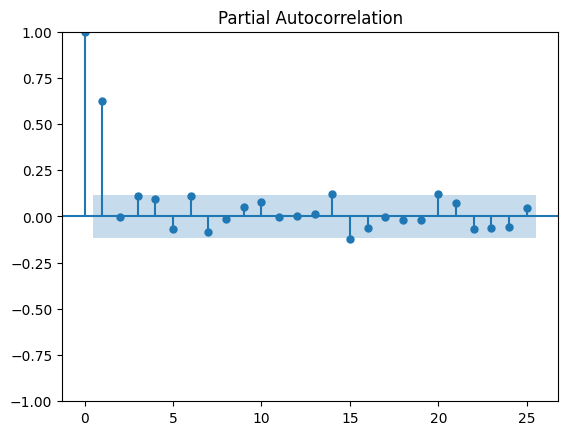

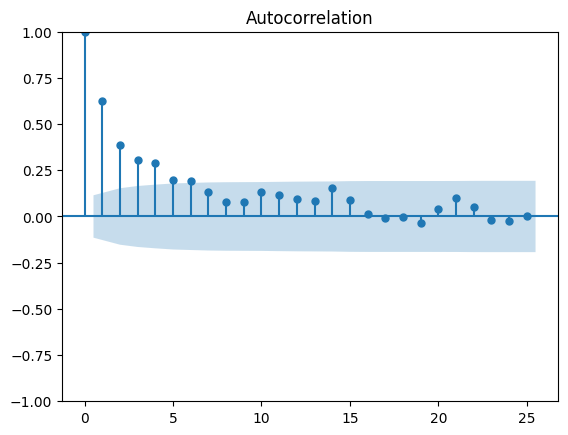

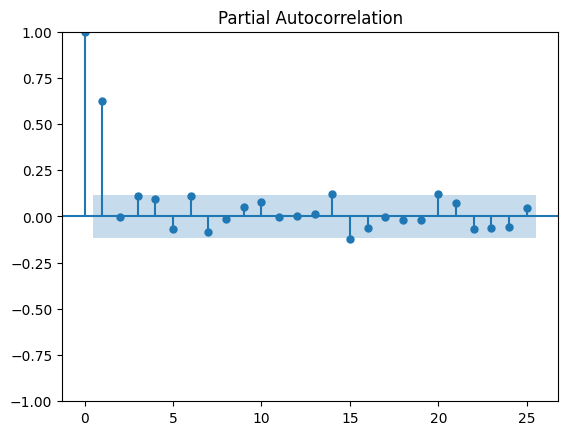

In [33]:
# Visualize autocorrelation using plot_acf
plot_acf(GWAP_train, lags=25, alpha=0.05)  # Plot autocorrelation using plot_acf with confidence interval
# Generate a partial autocorrelation plot
plot_pacf(GWAP_train, lags=25, alpha=0.05)

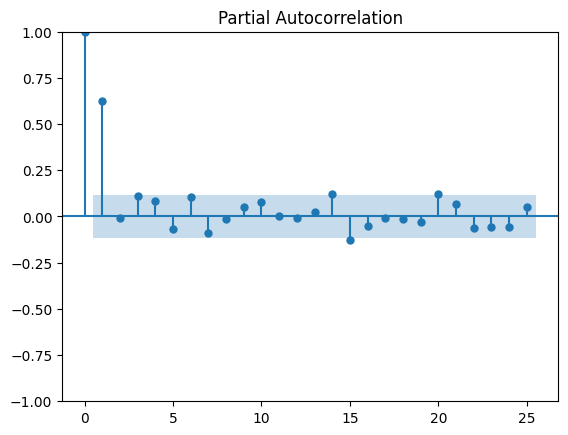

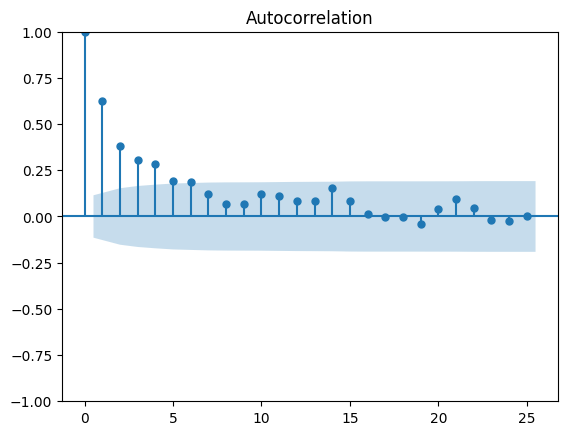

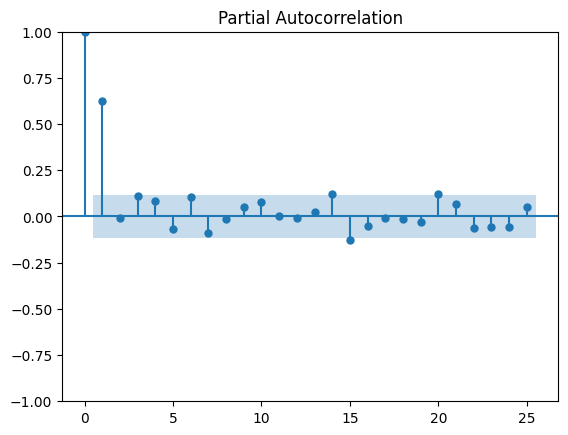

In [34]:
#Mindanao LWAP
# Visualize autocorrelation using plot_acf
plot_acf(LWAP_train, lags=25, alpha=0.05)  # Plot autocorrelation using plot_acf with confidence interval
# Generate a partial autocorrelation plot
plot_pacf(LWAP_train, lags=25, alpha=0.05)

Forecast using statsmodels

In [52]:
def seasonal_auto_arima(df, max_p, max_d, max_q, exog_data=None):
    lowest_aic = float("inf")
    best_model = None
    
    # Sequence of seasonal periods to try
    seq = [1,2,3,4,5,6,7,14,30]
    for i in seq:
        try:
            model = auto_arima(df, 
                               start_p=0, start_d=0, start_q=0,
                               max_p=max_p, max_d=max_d, max_q=max_q, 
                               seasonal=True, m=i, 
                               start_P=0, start_D=0, start_Q=0,
                               error_action='warn', trace=False,
                               suppress_warnings=True, stepwise=False,
                               exog=exog_data, 
                               maxiter=300, method='powell')
            
            if model.aic() < lowest_aic:
                lowest_aic = model.aic()
                best_model = model

        except Exception as e:
            print(f"Model fitting failed for seasonality {i}: {e}")

    try:
        model = auto_arima(df, 
                           start_p=0, start_d=0, start_q=0,
                           max_p=max_p, max_d=max_d, max_q=max_q, 
                           seasonal=False,
                           error_action='warn', trace=False,
                           suppress_warnings=True, stepwise=False,
                           exog=exog_data, 
                           maxiter=300, method='powell')
        
        if model.aic() < lowest_aic:
            lowest_aic = model.aic()
            best_model = model

    except Exception as e:
        print(f"Non-seasonal model fitting failed: {e}")

    if best_model is not None:
        if best_model.seasonal_order == (0, 0, 0, 0):
            print(f"The model with the lowest AIC is non-seasonal with an AIC of {lowest_aic}")
        else:
            print(f"The model with the lowest AIC has a seasonal period of {best_model.seasonal_order[3]} and an AIC of {lowest_aic}")
    else:
        print("No suitable model found.")
        
    return best_model

# Example usage
# data = pd.read_csv('your_time_series_data.csv', parse_dates=True, index_col='Date')
# exog_data = pd.read_csv('your_exogenous_data.csv', parse_dates=True, index_col='Date')
# best_model = seasonal_auto_arima('your_target_column', data, max_p=5, max_d=2, max_q=5, exog_data=exog_data)


In [53]:
GWAP_sarimax = seasonal_auto_arima(GWAP_train, max_p=1, max_d=2, max_q=6, exog_data=diff_exog_train )

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecatio

The model with the lowest AIC has a seasonal period of 7 and an AIC of -527.525965169074


In [54]:
GWAP_sarimax

ARIMA(maxiter=300, method='powell', order=(1, 0, 0), scoring_args={},
      seasonal_order=(2, 0, 1, 7), suppress_warnings=True)

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Optimization terminated successfully.
         Current function value: -0.941423
         Iterations: 19
         Function evaluations: 3473


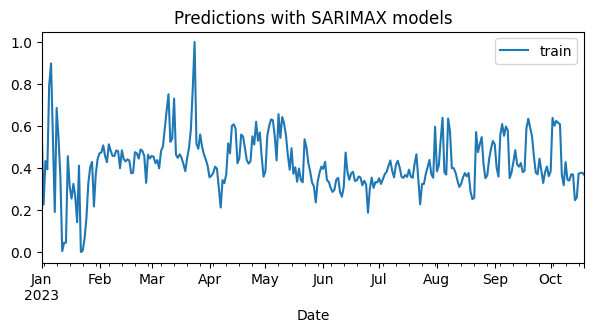

In [35]:
#Using statsmodels

gwap_model = SARIMAX(endog = GWAP_train, exog = diff_exog_train, order=(1, 0, 0), seasonal_order=(2,0,1,7))
gwap_model_results=gwap_model.fit(method='powell', maxiter=300)

gwap_train_predict = gwap_model_results.predict(start='2023-01-01', end='2023-10-19', exog=diff_exog_train)
fig, ax = plt.subplots(figsize=(7, 3))
GWAP_train.plot(ax=ax, label='train')
ax.set_title('Predictions with SARIMAX models')
ax.legend()

In [36]:
gwap_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                GWAP   No. Observations:                  292
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 7)   Log Likelihood                 274.896
Date:                             Wed, 29 Jan 2025   AIC                           -509.791
Time:                                     20:54:30   BIC                           -436.256
Sample:                                 01-01-2023   HQIC                          -480.336
                                      - 10-19-2023                                         
Covariance Type:                               opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
FLOW_MIN                   -0.0503      0.071     -0.708      0.479      -0.189       0.089
TMAX_Davao City             0.0205      0.027      0.750      0.454      -0.033       0.074
TMAX_Butuan                 0.0416      0.034      1.217      0.224      -0.025       0.109
RESERVE_GWAP_Fr             0.0109      0.015      0.731      0.465      -0.018       0.040
RESERVE_GWAP_Ru            -0.0406      0.032     -1.263      0.207      -0.103       0.022
RESERVE_GWAP_Rd            -0.0119      0.024     -0.492      0.623      -0.059       0.035
RESERVE_GWAP_Dr            -0.0040      0.020     -0.201      0.841      -0.044       0.036
RAINFALL_Davao City        -0.0307      0.027     -1.134      0.257      -0.084       0.022
RAINFALL_Surigao           -0.0046      0.018     -0.250      0.803      -0.041       0.031
RAINFALL_Zamboanga         -0.0189      0.029     -0.645      0.519      -0.076       0.039
RAINFALL_Dipolog           -0.0012      0.017     -0.074      0.941      -0.034       0.032
RAINFALL_Butuan             0.0009      0.019      0.046      0.964      -0.036       0.038
RAINFALL_Malaybalay        -0.0122      0.019     -0.660      0.509      -0.049       0.024
RAINFALL_General Santos    -0.0215      0.025     -0.849      0.396      -0.071       0.028
RAINFALL_Cotabato           0.0405      0.019      2.090      0.037       0.003       0.078
ar.L1                       0.7542      0.031     24.238      0.000       0.693       0.815
ar.S.L7                     0.7722      0.051     15.179      0.000       0.672       0.872
ar.S.L14                    0.2273      0.050      4.510      0.000       0.129       0.326
ma.S.L7                    -0.9579      0.074    -12.951      0.000      -1.103      -0.813
sigma2                      0.0082      0.001     11.894      0.000       0.007       0.010
===================================================================================
Ljung-Box (L1) (Q):                   1.56   Jarque-Bera (JB):               190.24
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

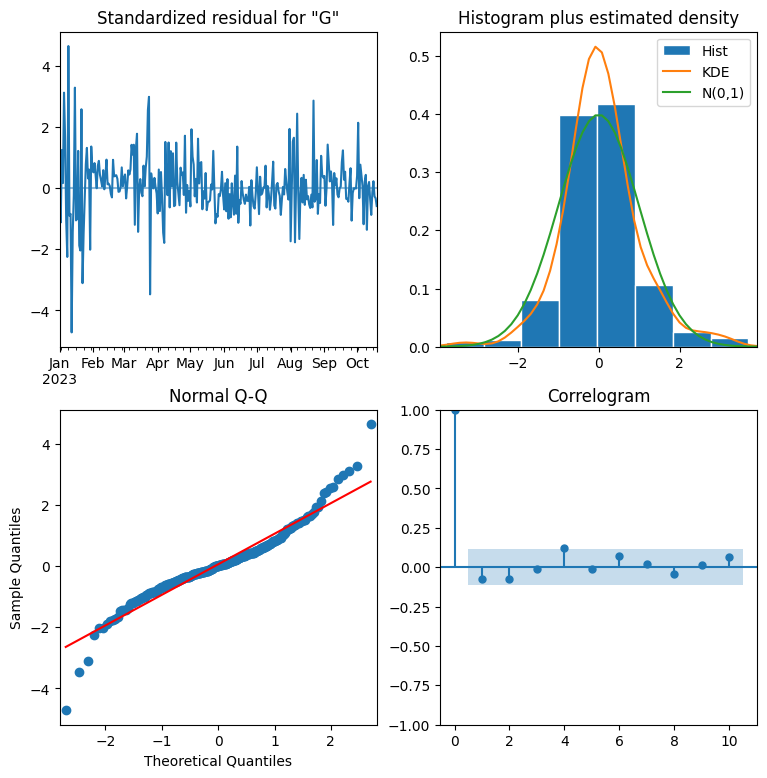

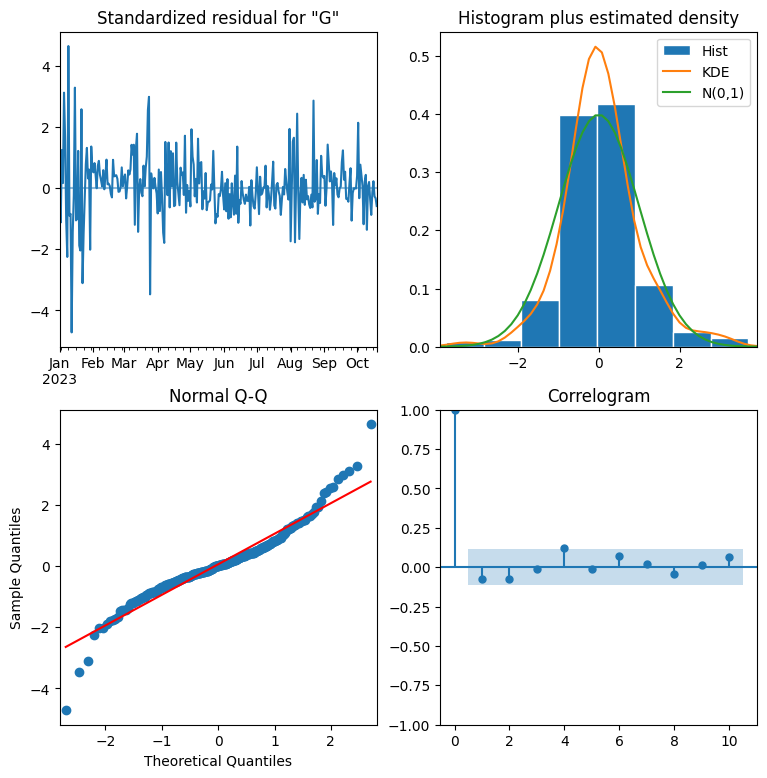

In [37]:
gwap_model_results.plot_diagnostics(figsize=(9,9))


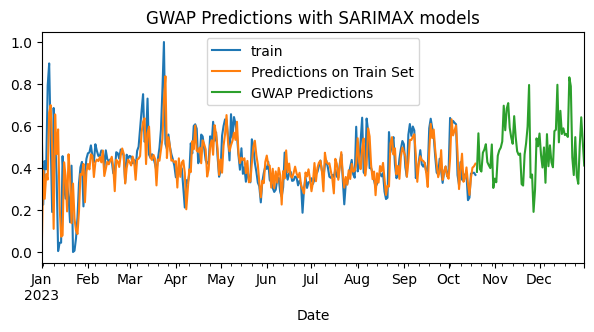

In [38]:

#Append model results to original data
appended_gwap = gwap_model_results.append(GWAP_test, exog=diff_exog_test, refit=False)

#Forecast day-ahead
gwap_test_predict = appended_gwap.predict(start='2023-10-20', end='2023-12-31', exog=diff_exog_test, dynamic=False)

fig, ax = plt.subplots(figsize=(7, 3))
GWAP_train.plot(ax=ax, label='train')
gwap_train_predict.plot(ax=ax, label='Predictions on Train Set')
gwap_test_predict.plot(ax=ax, label='GWAP Predictions')
ax.set_title('GWAP Predictions with SARIMAX models')
ax.legend()

In [66]:
LWAP_sarimax = seasonal_auto_arima(LWAP_train, max_p=1, max_d=2, max_q=14, exog_data=diff_exog_train )

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecatio

The model with the lowest AIC has a seasonal period of 7 and an AIC of -529.3599323640988


In [67]:
LWAP_sarimax

ARIMA(maxiter=300, method='powell', order=(1, 0, 0), scoring_args={},
      seasonal_order=(2, 0, 1, 7), suppress_warnings=True)

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Optimization terminated successfully.
         Current function value: -0.943086
         Iterations: 19
         Function evaluations: 3473


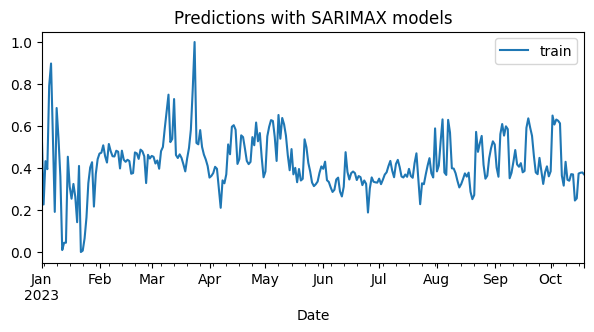

In [39]:
#Using statsmodels

lwap_model = SARIMAX(endog = LWAP_train, exog = diff_exog_train, order=(1, 0, 0), seasonal_order=(2,0,1,7))
lwap_model_results=lwap_model.fit(method='powell', maxiter=300)

lwap_train_predict = lwap_model_results.predict(start='2023-01-01', end='2023-10-19', exog=diff_exog_train)
fig, ax = plt.subplots(figsize=(7, 3))
LWAP_train.plot(ax=ax, label='train')
ax.set_title('Predictions with SARIMAX models')
ax.legend()

In [40]:
lwap_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                LWAP   No. Observations:                  292
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 7)   Log Likelihood                 275.381
Date:                             Wed, 29 Jan 2025   AIC                           -510.762
Time:                                     20:59:40   BIC                           -437.227
Sample:                                 01-01-2023   HQIC                          -481.307
                                      - 10-19-2023                                         
Covariance Type:                               opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
FLOW_MIN                   -0.0459      0.071     -0.643      0.520      -0.186       0.094
TMAX_Davao City             0.0251      0.027      0.921      0.357      -0.028       0.079
TMAX_Butuan                 0.0411      0.034      1.214      0.225      -0.025       0.107
RESERVE_GWAP_Fr             0.0100      0.015      0.665      0.506      -0.019       0.039
RESERVE_GWAP_Ru            -0.0392      0.032     -1.237      0.216      -0.101       0.023
RESERVE_GWAP_Rd            -0.0107      0.024     -0.443      0.658      -0.058       0.037
RESERVE_GWAP_Dr            -0.0038      0.020     -0.188      0.851      -0.044       0.036
RAINFALL_Davao City        -0.0336      0.027     -1.249      0.212      -0.086       0.019
RAINFALL_Surigao           -0.0039      0.018     -0.214      0.831      -0.040       0.032
RAINFALL_Zamboanga         -0.0148      0.029     -0.506      0.613      -0.072       0.043
RAINFALL_Dipolog            0.0013      0.017      0.078      0.938      -0.032       0.034
RAINFALL_Butuan            -0.0014      0.019     -0.071      0.943      -0.039       0.036
RAINFALL_Malaybalay        -0.0127      0.019     -0.685      0.493      -0.049       0.024
RAINFALL_General Santos    -0.0230      0.025     -0.908      0.364      -0.072       0.027
RAINFALL_Cotabato           0.0392      0.019      2.026      0.043       0.001       0.077
ar.L1                       0.7505      0.031     23.921      0.000       0.689       0.812
ar.S.L7                     0.7696      0.050     15.241      0.000       0.671       0.869
ar.S.L14                    0.2298      0.050      4.592      0.000       0.132       0.328
ma.S.L7                    -0.9533      0.068    -14.019      0.000      -1.087      -0.820
sigma2                      0.0082      0.001     12.319      0.000       0.007       0.009
===================================================================================
Ljung-Box (L1) (Q):                   1.57   Jarque-Bera (JB):               182.61
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

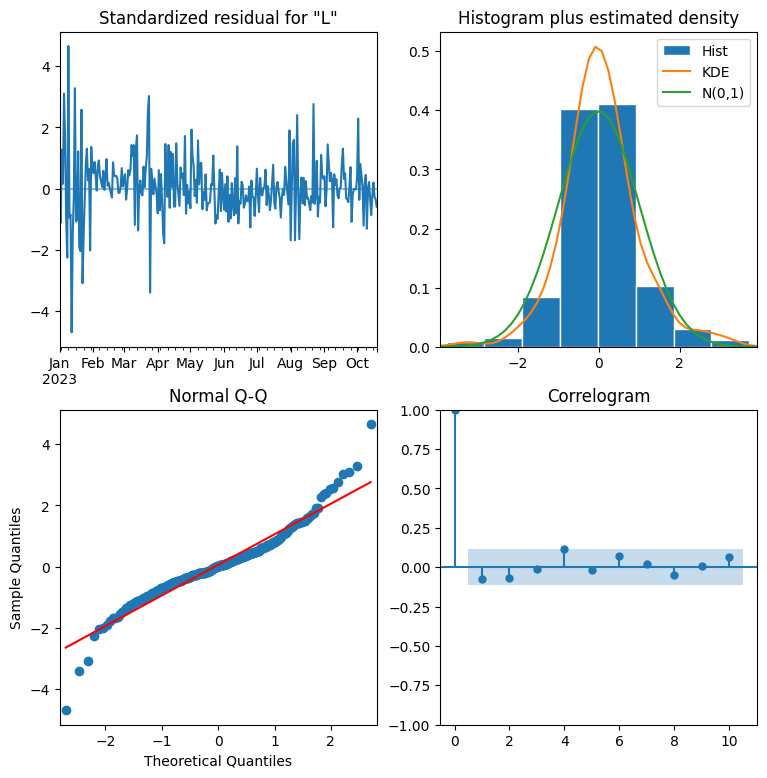

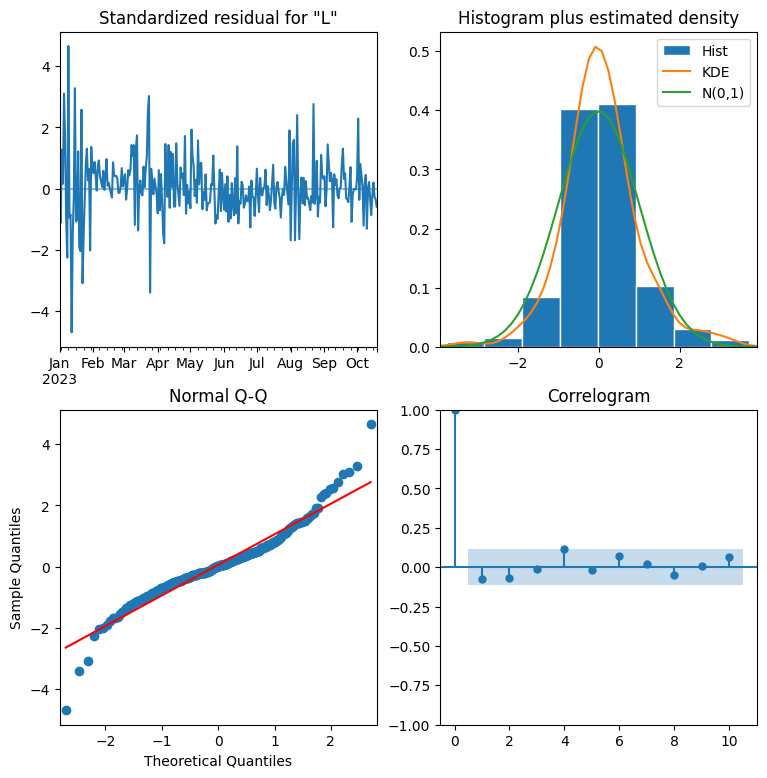

In [41]:
lwap_model_results.plot_diagnostics(figsize=(9,9))

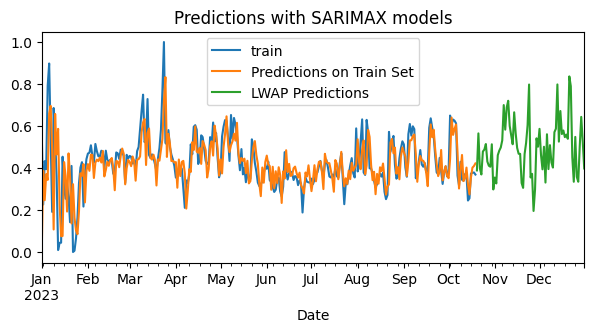

In [43]:
#Append model results to original data
appended_lwap = lwap_model_results.append(LWAP_test, exog=diff_exog_test, refit=False)

#Forecast day-ahead
lwap_test_predict = appended_lwap.predict(start='2023-10-20', end='2023-12-31', exog=diff_exog_test, dynamic=False)

fig, ax = plt.subplots(figsize=(7, 3))
LWAP_train.plot(ax=ax, label='train')
lwap_train_predict.plot(ax=ax, label='Predictions on Train Set')
lwap_test_predict.plot(ax=ax, label='LWAP Predictions')
ax.set_title('Predictions with SARIMAX models')
ax.legend()

Applying inverse transformations - non-rolling

In [44]:
all_predictions = pd.concat([gwap_test_predict, lwap_test_predict], axis=1)
all_predictions_inverse=boxcoxy_fit_loaded.inverse_transform(all_predictions)
all_predictions_inverse

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PowerTransformer was fitted with feature names



array([[ 4013.45446042,  4346.05501221],
       [ 7734.53337805,  8134.63785089],
       [ 4249.68186756,  4516.08022347],
       [ 4039.91919043,  3994.03918231],
       [ 5734.76162391,  6152.44148818],
       [ 6044.36666005,  6356.68742818],
       [ 6580.73911376,  6945.62206764],
       [ 4857.72153668,  5159.95961568],
       [ 4568.87800211,  4771.43273677],
       [ 4328.60119862,  4678.31940862],
       [ 6553.17004576,  6915.89878589],
       [ 2777.83961186,  2803.91861277],
       [ 3473.32375929,  3737.42047647],
       [ 3191.52607569,  3259.58083177],
       [ 5445.59007009,  5780.25443115],
       [ 5965.56330281,  6243.84086933],
       [ 6235.86069701,  6571.7937793 ],
       [ 6859.82588091,  7346.72371135],
       [11009.88184764, 11688.14979235],
       [ 8070.93573139,  8572.53505969],
       [10633.43261867, 11385.0953073 ],
       [11338.13172811, 12275.30215044],
       [ 8369.49052955,  9015.25478612],
       [ 7304.99811748,  7916.07064639],
       [ 6622.73

In [45]:
all_predictions_inverse_df = pd.DataFrame(all_predictions_inverse)
all_predictions_inverse_df.rename(columns={'0': 'GWAP', '1': 'LWAP'}, inplace=True)

GWAP_predictions_inverse = pd.DataFrame(all_predictions_inverse[:, 0], columns=['GWAP'])
GWAP_predictions_inverse = pd.concat([test_date,GWAP_predictions_inverse], axis=1)
GWAP_predictions_inverse.set_index('Date', inplace=True)
GWAP_predictions_inverse.index = pd.to_datetime(GWAP_predictions_inverse.index)
GWAP_predictions_inverse.index.freq='D'
GWAP_predictions_inverse = GWAP_predictions_inverse.squeeze()

LWAP_predictions_inverse = pd.DataFrame(all_predictions_inverse[:, 1], columns=['LWAP'])
LWAP_predictions_inverse = pd.concat([test_date,LWAP_predictions_inverse], axis=1)
LWAP_predictions_inverse.set_index('Date', inplace=True)
LWAP_predictions_inverse.index = pd.to_datetime(LWAP_predictions_inverse.index)
LWAP_predictions_inverse.index.freq='D'
LWAP_predictions_inverse = LWAP_predictions_inverse.squeeze()

In [46]:
# Calculate MAE for the Mindanao GWAP test set
mae_test = mean_absolute_error(GWAP_test_inversed, GWAP_predictions_inverse)
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")

# Calculate RMSE for the Mindanao GWAP test set
mse_test = mean_squared_error(GWAP_test_inversed, GWAP_predictions_inverse)
rmse_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test}")
GWAP.plot(ax=ax, label='Original Data')
GWAP_predictions_inverse.plot(ax=ax, label='Predictions on Test Set', linestyle='--')
ax.set_title('SARIMAX Mindanao GWAP Predictions')
ax.legend()
plt.show()

Mean Absolute Error (MAE) on Test Set: 3033.4041774036245
Root Mean Squared Error (RMSE) on Test Set: 3816.744749406821


Mean Absolute Error (MAE) on Test Set: 3215.4223007103087
Root Mean Squared Error (RMSE) on Test Set: 4064.8673101629597


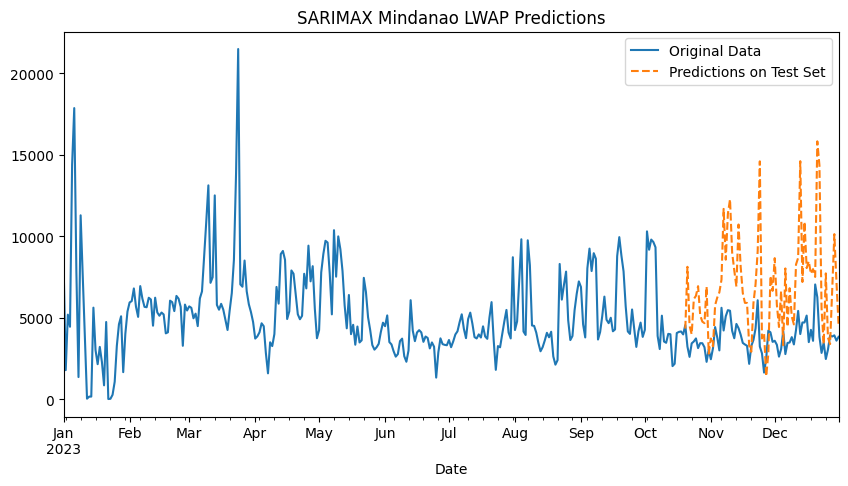

In [47]:
# Calculate MAE for the Mindanao LWAP test set
mae_test = mean_absolute_error(LWAP_test_inversed, LWAP_predictions_inverse)
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")

# Calculate RMSE for the Mindanao LWAP test set
mse_test = mean_squared_error(LWAP_test_inversed, LWAP_predictions_inverse)
rmse_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test}")

# Plot predictions
fig, ax = plt.subplots(figsize=(10, 5))
LWAP.plot(ax=ax, label='Original Data')
LWAP_predictions_inverse.plot(ax=ax, label='Predictions on Test Set', linestyle='--')
ax.set_title('SARIMAX Mindanao LWAP Predictions')
ax.legend()
plt.show()

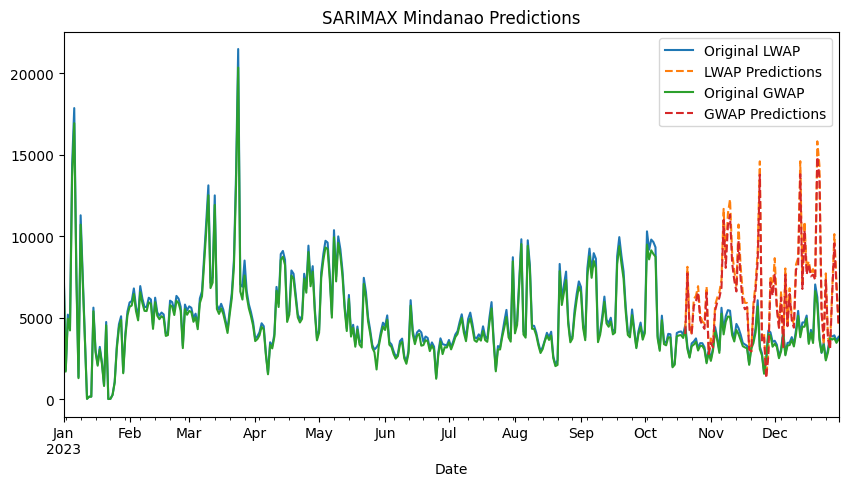

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))
LWAP.plot(ax=ax, label='Original LWAP')
LWAP_predictions_inverse.plot(ax=ax, label='LWAP Predictions', linestyle='--')
GWAP.plot(ax=ax, label='Original GWAP')
GWAP_predictions_inverse.plot(ax=ax, label='GWAP Predictions', linestyle='--')
ax.set_title('SARIMAX Mindanao Predictions')
ax.legend()
plt.show()

In [49]:
GWAP_predictions_inverse.to_csv('min-gwap-predictions.csv', index=False)
LWAP_predictions_inverse.to_csv('min-lwap-predictions.csv', index=False)